# load data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

data = pd.read_csv("/kaggle/input/smoking-drinking-dataset/smoking_driking_dataset_Ver01.csv")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Define function

In [2]:
# Outlier detection was performed
# define my method, quantile 
def my_outlier_IQR(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    outlier_list = []
    for x_data in data:
        if x_data > Q3 + 1.5 * IQR or x_data < Q1 - 1.5 * IQR:
            outlier_list.append(True)
        else:
            outlier_list.append(False)
    return outlier_list

def my_outlier_Zscore(data):
    threshold = 3
    
    data_mean = data.mean()
    data_std = data.std()
    
    z_score = [(x_data - data_mean) / data_std for x_data in data]
    mask = [abs(z) > threshold for z in z_score] # True & False

    return mask

def draw_plt_table(data, name, num_bins = 30):
    my_edgecolor = 'black'
    sub_data = data[name]
    TF_Zscore = my_outlier_Zscore(sub_data)
    TF_IQR = my_outlier_IQR(sub_data) # True & False list using my_outlier
    
    plt.figure(figsize=(15,4))
    plt.subplot(1, 3, 1)
    plt.hist(sub_data, bins = num_bins, edgecolor=my_edgecolor)
    plt.title('Original')
    plt.subplot(1, 3, 2)
    plt.hist(sub_data[TF_IQR], bins = num_bins, edgecolor=my_edgecolor)
    plt.title('Zscore filter')
    plt.subplot(1, 3, 3)
    plt.hist(sub_data[[not x for x in TF_IQR]], bins = num_bins, edgecolor=my_edgecolor)
    plt.title('Filtered data')
    plt.suptitle(name + '(IQR)')
    
    plt.show()
    
    plt.figure(figsize=(15,4))
    plt.subplot(1, 3, 1)
    plt.hist(sub_data, bins = num_bins, edgecolor=my_edgecolor)
    plt.title('Original')
    plt.subplot(1, 3, 2)
    plt.hist(sub_data[TF_Zscore], bins = num_bins, edgecolor=my_edgecolor)
    plt.title('Zscore filter')
    plt.subplot(1, 3, 3)
    plt.hist(sub_data[[not x for x in TF_Zscore]], bins = num_bins, edgecolor=my_edgecolor)
    plt.title('Filtered data')
    plt.suptitle(name + '(Z-score)')
    
    plt.show()
    
    table_original = sub_data.value_counts(bins = num_bins, sort = False)
    table_TF_IQR = sub_data[TF_IQR].value_counts(bins = num_bins, sort = False)
    table_TF_Zscore = sub_data[TF_Zscore].value_counts(bins = num_bins, sort = False)
    
    result_df = pd.DataFrame({'Original': table_original.index, 'Counts(raw)': table_original.values,
                              'IQR filter' : table_TF_IQR.index, 'Counts(IQR)': table_TF_IQR.values,
                              'Z-score':table_TF_Zscore.index, 'Counts(Z-score)': table_TF_Zscore.values})
    
    return result_df

def check_null_ratio(data):
    print(f'Outlier : {data.isnull().sum()} \nRatio : { round((data.isnull().sum() / data.count())*100, 5) }% ')

## Data information

In [3]:
# you can check Dtype, Non-Null count
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991346 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991346 non-null  object 
 1   age               991346 non-null  int64  
 2   height            991346 non-null  int64  
 3   weight            991346 non-null  int64  
 4   waistline         991346 non-null  float64
 5   sight_left        991346 non-null  float64
 6   sight_right       991346 non-null  float64
 7   hear_left         991346 non-null  float64
 8   hear_right        991346 non-null  float64
 9   SBP               991346 non-null  float64
 10  DBP               991346 non-null  float64
 11  BLDS              991346 non-null  float64
 12  tot_chole         991346 non-null  float64
 13  HDL_chole         991346 non-null  float64
 14  LDL_chole         991346 non-null  float64
 15  triglyceride      991346 non-null  float64
 16  hemoglobin        99

In [4]:
# mean, min, max, etc without object(sec, DRK_YN)
data.describe()

,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,BLDS,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd
count,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000
mean,47.614491,162.240625,63.284050,81.233358,0.980834,0.978429,1.031495,1.030476,122.432498,76.052627,100.424447,195.557020,56.936800,113.037692,132.141751,14.229824,1.094224,0.860467,25.989308,25.755051,37.136347,1.608122
std,14.181339,9.282957,12.514241,11.850323,0.605949,0.604774,0.174650,0.171892,14.543148,9.889365,24.179960,38.660155,17.238479,35.842812,102.196985,1.584929,0.437724,0.480530,23.493386,26.308599,50.424153,0.818507
min,20.000000,130.000000,25.000000,8.000000,0.100000,0.100000,1.000000,1.000000,67.000000,32.000000,25.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.100000,1.000000,1.000000,1.000000,1.000000
25%,35.000000,155.000000,55.000000,74.100000,0.700000,0.700000,1.000000,1.000000,112.000000,70.000000,88.000000,169.000000,46.000000,89.000000,73.000000,13.200000,1.000000,0.700000,19.000000,15.000000,16.000000,1.000000
50%,45.000000,160.000000,60.000000,81.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,96.000000,193.000000,55.000000,111.000000,106.000000,14.300000,1.000000,0.800000,23.000000,20.000000,23.000000,1.000000
75%,60.000000,170.000000,70.000000,87.800000,1.200000,1.200000,1.000000,1.000000,131.000000,82.000000,105.000000,219.000000,66.000000,135.000000,159.000000,15.400000,1.000000,1.000000,28.000000,29.000000,39.000000,2.000000
max,85.000000,190.000000,140.000000,999.000000,9.900000,9.900000,2.000000,2.000000,273.000000,185.000000,852.000000,2344.000000,8110.000000,5119.000000,9490.000000,25.000000,6.000000,98.000000,9999.000000,7210.000000,999.000000,3.000000


# Data range test
Strange data were found in some columns(waistline, sight, SBP, DBP, and so on). For example, the max of waistline is 999.0. Since this value can not exist, we need to look at the quality of the data such a range test(min & max).
The meaning of range testing is a test to check whether the min. and max. values of data can be measured or exist.

## 1. Waistline column

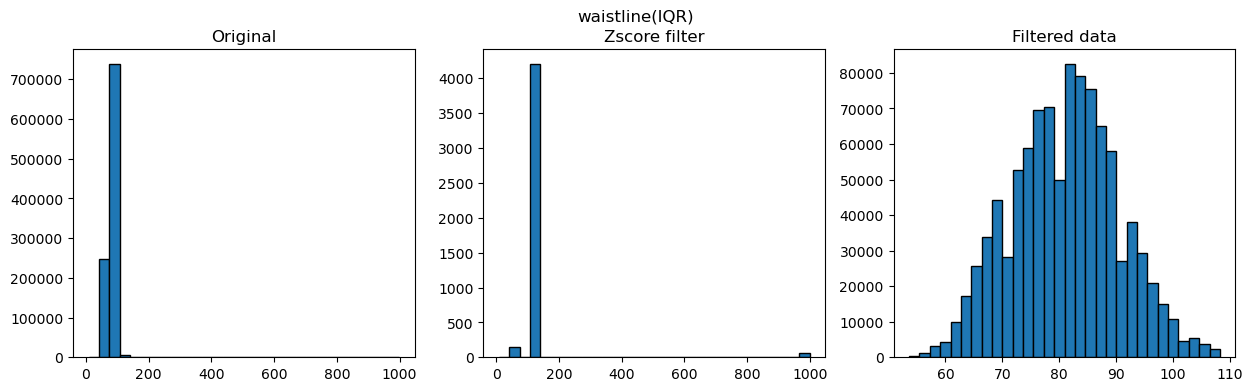

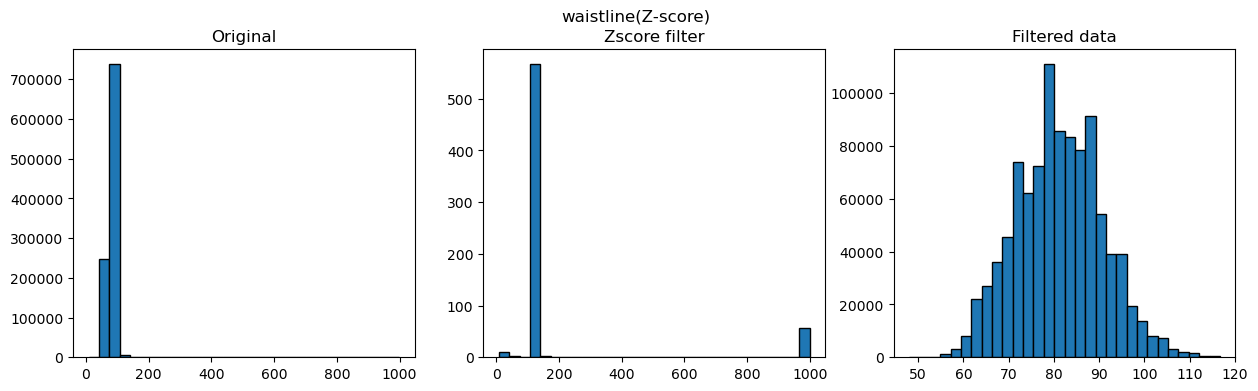

,Original,Counts(raw),IQR filter,Counts(IQR),Z-score,Counts(Z-score)
0,"(7.008, 41.033]",10,"(7.008, 41.033]",10,"(7.008, 41.033]",10
1,"(41.033, 74.067]",247537,"(41.033, 74.067]",143,"(41.033, 74.067]",2
2,"(74.067, 107.1]",738396,"(74.067, 107.1]",0,"(74.067, 107.1]",0
3,"(107.1, 140.133]",5344,"(107.1, 140.133]",4205,"(107.1, 140.133]",567
4,"(140.133, 173.167]",2,"(140.133, 173.167]",2,"(140.133, 173.167]",2
5,"(173.167, 206.2]",0,"(173.167, 206.2]",0,"(173.167, 206.2]",0
6,"(206.2, 239.233]",0,"(206.2, 239.233]",0,"(206.2, 239.233]",0
7,"(239.233, 272.267]",0,"(239.233, 272.267]",0,"(239.233, 272.267]",0
8,"(272.267, 305.3]",0,"(272.267, 305.3]",0,"(272.267, 305.3]",0
9,"(305.3, 338.333]",0,"(305.3, 338.333]",0,"(305.3, 338.333]",0


In [5]:
draw_plt_table(data, 'waistline')

In [6]:
# Look at ( 965.967, 999.0 ] : 57
# 57 are classified as outliers.
data.loc[data.waistline == 999, 'waistline'] = None

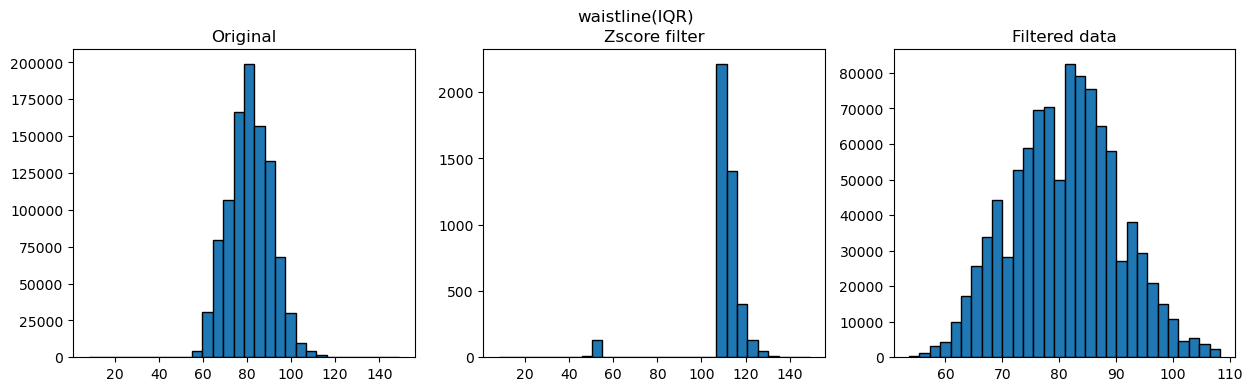

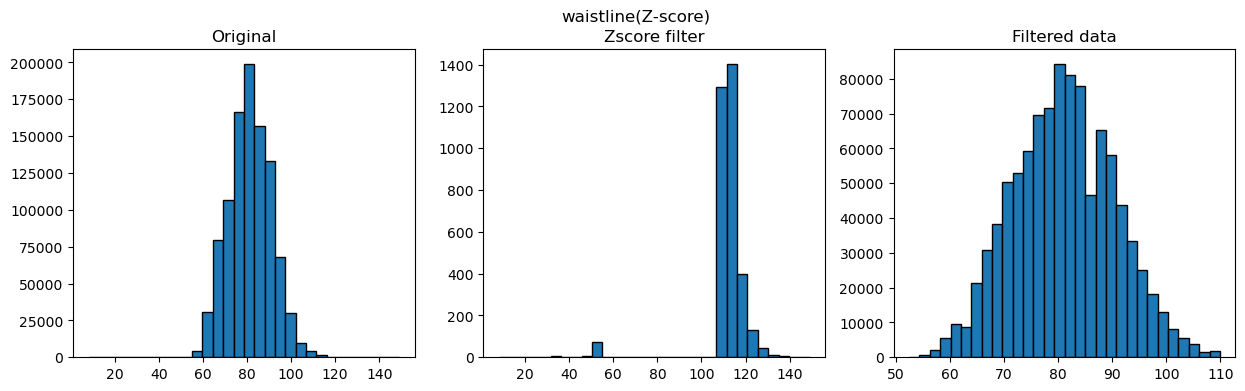

,Original,Counts(raw),IQR filter,Counts(IQR),Z-score,Counts(Z-score)
0,"(7.858, 12.703]",1,"(7.858, 12.703]",1,"(7.858, 12.703]",1
1,"(12.703, 17.407]",0,"(12.703, 17.407]",0,"(12.703, 17.407]",0
2,"(17.407, 22.11]",0,"(17.407, 22.11]",0,"(17.407, 22.11]",0
3,"(22.11, 26.813]",0,"(22.11, 26.813]",0,"(22.11, 26.813]",0
4,"(26.813, 31.517]",3,"(26.813, 31.517]",3,"(26.813, 31.517]",3
5,"(31.517, 36.22]",5,"(31.517, 36.22]",5,"(31.517, 36.22]",5
6,"(36.22, 40.923]",1,"(36.22, 40.923]",1,"(36.22, 40.923]",1
7,"(40.923, 45.627]",2,"(40.923, 45.627]",2,"(40.923, 45.627]",2
8,"(45.627, 50.33]",8,"(45.627, 50.33]",8,"(45.627, 50.33]",8
9,"(50.33, 55.033]",469,"(50.33, 55.033]",133,"(50.33, 55.033]",71


In [7]:
# first recheck
draw_plt_table(data, 'waistline')

In [8]:
# Look at (7.858, 12.703] : 1
# Min. value is too small. so we need to remove the nunimum. at this time I just change it to None.
data.loc[data.waistline <= 12.703, 'waistline'] = None

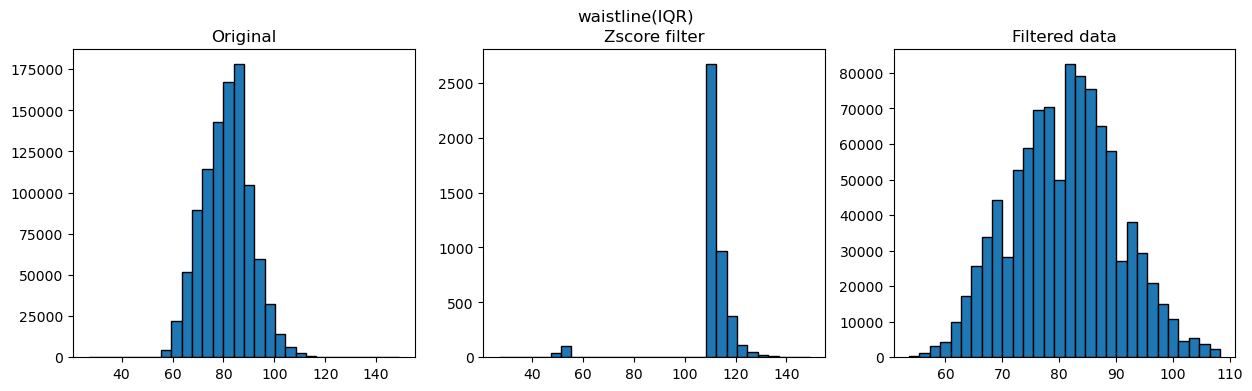

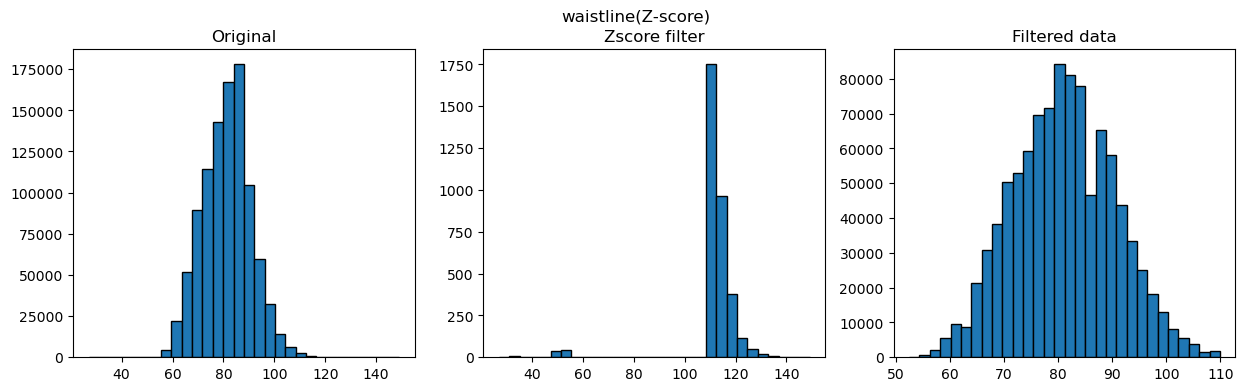

,Original,Counts(raw),IQR filter,Counts(IQR),Z-score,Counts(Z-score)
0,"(26.877, 31.07]",3,"(26.877, 31.07]",3,"(26.877, 31.07]",3
1,"(31.07, 35.14]",5,"(31.07, 35.14]",5,"(31.07, 35.14]",5
2,"(35.14, 39.21]",0,"(35.14, 39.21]",0,"(35.14, 39.21]",0
3,"(39.21, 43.28]",3,"(39.21, 43.28]",3,"(39.21, 43.28]",3
4,"(43.28, 47.35]",0,"(43.28, 47.35]",0,"(43.28, 47.35]",0
5,"(47.35, 51.42]",36,"(47.35, 51.42]",36,"(47.35, 51.42]",36
6,"(51.42, 55.49]",455,"(51.42, 55.49]",105,"(51.42, 55.49]",43
7,"(55.49, 59.56]",4460,"(55.49, 59.56]",0,"(55.49, 59.56]",0
8,"(59.56, 63.63]",21745,"(59.56, 63.63]",0,"(59.56, 63.63]",0
9,"(63.63, 67.7]",51982,"(63.63, 67.7]",0,"(63.63, 67.7]",0


In [9]:
# second recheck
draw_plt_table(data, 'waistline')

> **I investigated the clothing sizes of Korean adult women and determined the waistline corresponding to the smallest clothing size as the minimum value(25 inch). so I desided values below 55.49 from IQR and Z-score.**

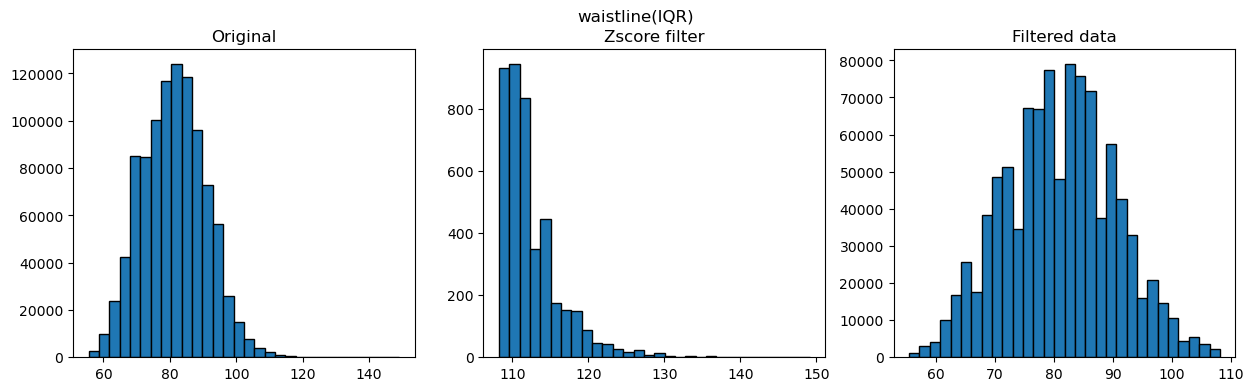

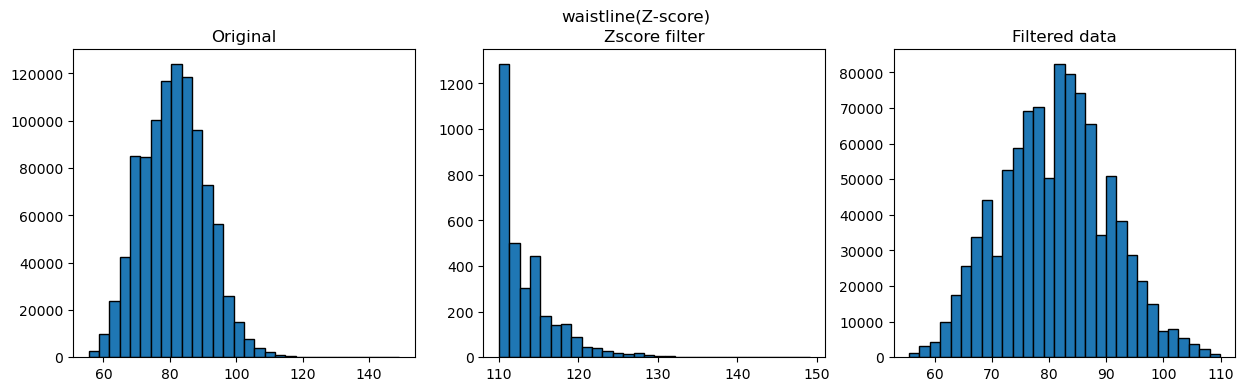

,Original,Counts(raw),IQR filter,Counts(IQR),Z-score,Counts(Z-score)
0,"(55.405, 58.62]",2591,"(108.158, 109.563]",930,"(109.96, 111.303]",1285
1,"(58.62, 61.74]",9902,"(109.563, 110.927]",944,"(111.303, 112.607]",502
2,"(61.74, 64.86]",23716,"(110.927, 112.29]",835,"(112.607, 113.91]",304
3,"(64.86, 67.98]",42536,"(112.29, 113.653]",349,"(113.91, 115.213]",445
4,"(67.98, 71.1]",85831,"(113.653, 115.017]",445,"(115.213, 116.517]",180
5,"(71.1, 74.22]",83933,"(115.017, 116.38]",175,"(116.517, 117.82]",141
6,"(74.22, 77.34]",100458,"(116.38, 117.743]",152,"(117.82, 119.123]",145
7,"(77.34, 80.46]",117020,"(117.743, 119.107]",148,"(119.123, 120.427]",89
8,"(80.46, 83.58]",124031,"(119.107, 120.47]",89,"(120.427, 121.73]",47
9,"(83.58, 86.7]",118718,"(120.47, 121.833]",47,"(121.73, 123.033]",42


In [10]:
# recheck 
data.loc[data.waistline <= 55.49, 'waistline'] = None
draw_plt_table(data, 'waistline')

> Althouth it is not expert knowledge, I found out through research that the waistline in Korea is 150 com. Therefore, I decided that the above data(55.49 cm <= x <= 150 cm) was the good data to analyze.**(IQR and Z-score are not applied.)**

In [11]:
# Let's check how much data was deleted.
check_null_ratio(data.waistline)

Outlier : 560 
Ratio : 0.05652% 


Only a very small amount of data(0.05%) was excluded. I think it is necessary to follow the same procedure as above for other columns.  
Finally, I decided the corrected range of waistline, 55.49 cm < waistline < 150 cm.

## 2. Sight(left and right) column
Cheeking the sight(left and right) column as described above, you can find 9.9. This value means blind so it were not excluded from the dataset.

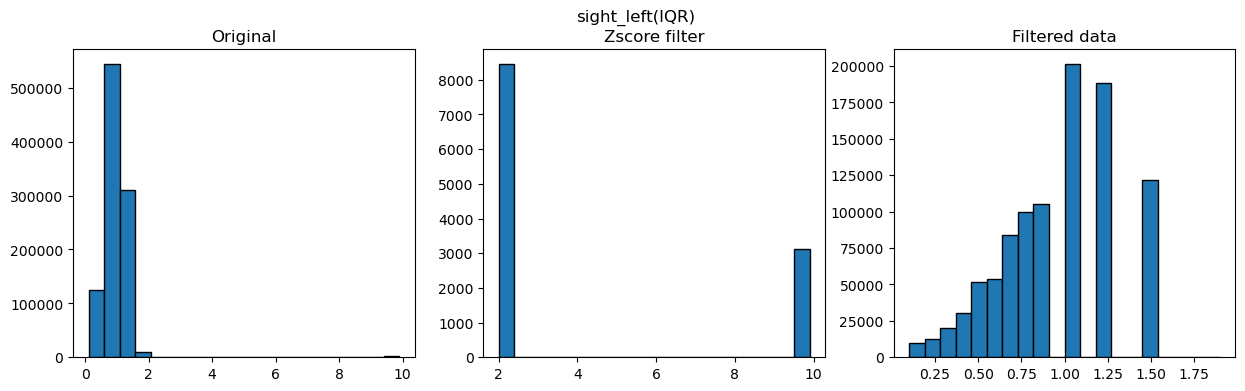

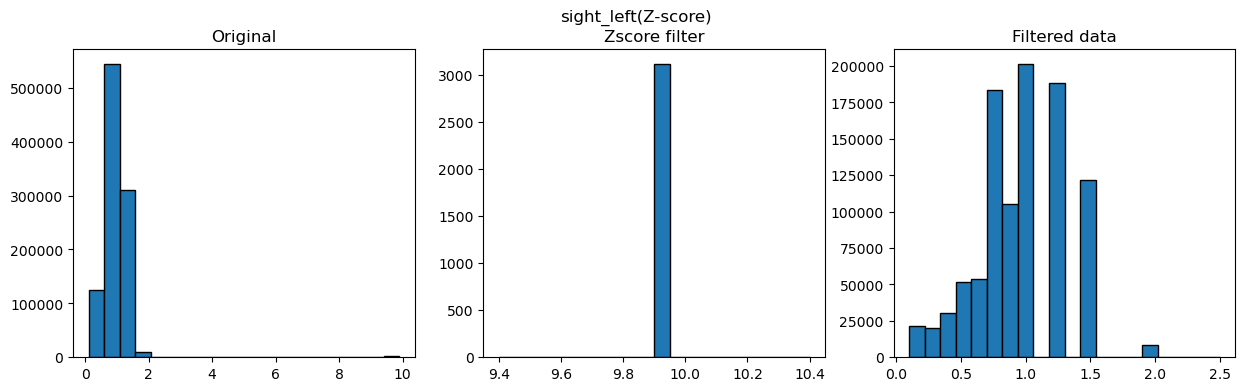

,Original,Counts(raw),IQR filter,Counts(IQR),Z-score,Counts(Z-score)
0,"(0.0892, 0.59]",124785,"(1.991, 2.395]",8457,"(9.889000000000001, 9.891]",0
1,"(0.59, 1.08]",544021,"(2.395, 2.79]",7,"(9.891, 9.892]",0
2,"(1.08, 1.57]",310516,"(2.79, 3.185]",0,"(9.892, 9.893]",0
3,"(1.57, 2.06]",8894,"(3.185, 3.58]",0,"(9.893, 9.894]",0
4,"(2.06, 2.55]",12,"(3.58, 3.975]",0,"(9.894, 9.895]",0
5,"(2.55, 3.04]",0,"(3.975, 4.37]",0,"(9.895, 9.896]",0
6,"(3.04, 3.53]",0,"(4.37, 4.765]",0,"(9.896, 9.897]",0
7,"(3.53, 4.02]",0,"(4.765, 5.16]",0,"(9.897, 9.898]",0
8,"(4.02, 4.51]",0,"(5.16, 5.555]",0,"(9.898, 9.899]",0
9,"(4.51, 5.0]",0,"(5.555, 5.95]",0,"(9.899, 9.9]",3118


In [12]:
draw_plt_table(data, name = 'sight_left', num_bins = 20)

I think two data(sight_left, sight_right) is normal and also are cleaning data for my analysis.

## 3. BLDS column


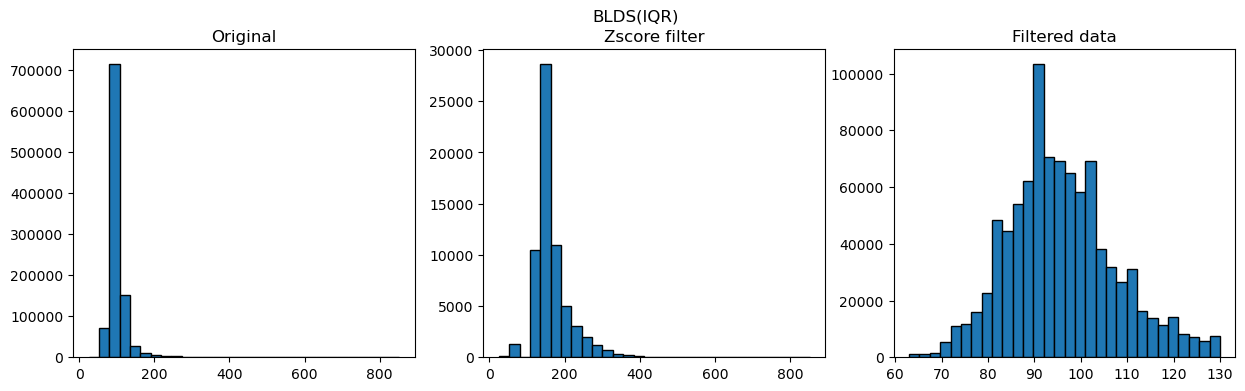

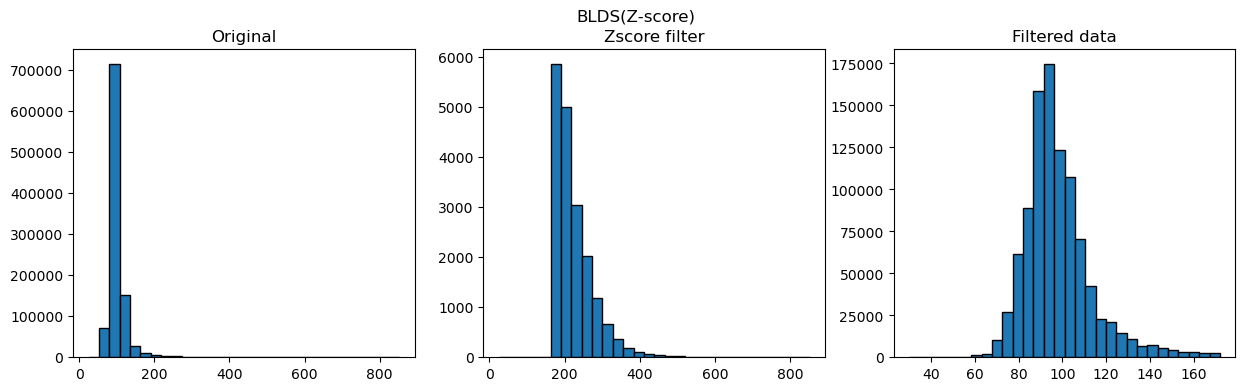

,Original,Counts(raw),IQR filter,Counts(IQR),Z-score,Counts(Z-score)
0,"(24.171999999999997, 52.567]",116,"(24.171999999999997, 52.567]",116,"(24.171999999999997, 52.567]",1
1,"(52.567, 80.133]",71653,"(52.567, 80.133]",1328,"(52.567, 80.133]",0
2,"(80.133, 107.7]",714427,"(80.133, 107.7]",0,"(80.133, 107.7]",0
3,"(107.7, 135.267]",152833,"(107.7, 135.267]",10441,"(107.7, 135.267]",0
4,"(135.267, 162.833]",28635,"(135.267, 162.833]",28635,"(135.267, 162.833]",0
5,"(162.833, 190.4]",10918,"(162.833, 190.4]",10918,"(162.833, 190.4]",5855
6,"(190.4, 217.967]",5000,"(190.4, 217.967]",5000,"(190.4, 217.967]",5000
7,"(217.967, 245.533]",3049,"(217.967, 245.533]",3049,"(217.967, 245.533]",3049
8,"(245.533, 273.1]",2026,"(245.533, 273.1]",2026,"(245.533, 273.1]",2026
9,"(273.1, 300.667]",1180,"(273.1, 300.667]",1180,"(273.1, 300.667]",1180


In [13]:
draw_plt_table(data, name = 'BLDS')

It is known that if BLDS is over 340, a person is unconscious. So, the data of 340 over is considered an emergency or incorrectly measured data. My knowledge may not be accurate. If you have any more information, please open a discussion and let us know.

# Notice for clearning or quality check

Here is my condition for data anlysis.

- waistline : 55.49 cm ~ 150 cm
- sight_left : 9.9 loss of sight
- sight_right : 9.9 loss of sight
- SBP : ~ 180 mmHg
- DBP : ~ 110 mmHg
- BLDS : ~ 340 mg/dL
- tot_chole : 100 mg/dL ~ 500 mg/dL
- triglyceride : ~ 1000 mg/dL
- serum_creatinine : 0.3 ~ 2.0 mg/dL
- gemoglobin : 6 g/dL ~
- AST : ~ 400 IU/L
- ALT : ~ 400 IU/L
- gamma_GTP : ~ 400 IU/L

These are my conditions I will use in future analysis. I am not a medical expert so I am not sure about this. I thought strangely about the values I thought were critical, searche for the, and established my own conditions. If you have anyone information or idea, please open a discussion. I hope you have something to share with me. Thank you for use dataset and read my notebook. Have a nice day.


# plot for EDA
Using the above conditions, I cleaned the data and plot it.

In [14]:
# clearning data
data.loc[(data.waistline < 55.49) | (data.waistline > 150), 'waistline'] = None
data.loc[(data.SBP > 180), 'SBP'] = None
data.loc[data.DBP > 110, 'DBP'] = None
data.loc[data.BLDS > 340, 'BLDS'] = None
data.loc[data.triglyceride > 1000, 'triglyceride'] = None
data.loc[data.hemoglobin < 6, 'hemoglobin'] = None
data.loc[(data.serum_creatinine < 0.3) | (data.serum_creatinine > 2.0), 'serum_creatinine' ] = None
data.loc[(data.tot_chole < 100) | (data.tot_chole > 500), 'tot_chole'] = None
data.loc[data.SGOT_AST > 400, 'SGOT_AST'] = None
data.loc[data.SGOT_ALT > 400, 'SGOT_ALT'] = None
data.loc[data.gamma_GTP > 400, 'gamma_GTP'] = None
data.loc[(data.HDL_chole < 30) | (data.HDL_chole > 100), 'HDL_chole' ] = None
data.loc[(data.LDL_chole < 50) | (data.LDL_chole > 200), 'LDL_chole'] = None

data.dropna(inplace = True)

## Define Group
### Target Group
- 흡연과 음주 모두 하지않는 집단 -> 'No Smoke & Drink'
- 흡연만 하는 집단 -> 'Smoke Only'
- 음주만 하는 집단 -> 'Drink Only'
- 흡연과 음주 모두 하는 집단 -> 'Smoke & Drink'

In [15]:
# Thank 재성 for shearing this code
def func1(x):
    if (x['SMK_stat_type_cd'] == (1.0 or 2.0)) and (x['DRK_YN'] == 'N'):
        return 'No Smoke & Drink'
    elif (x['SMK_stat_type_cd'] == 3.0) and (x['DRK_YN'] == 'N'):
        return 'Smoke Only'
    elif (x['SMK_stat_type_cd'] == (1.0 or 2.0)) and (x['DRK_YN'] == 'Y'):
        return 'Drink Only'
    else:
        return 'Smoke & Drink'

data['Group'] = data.apply(func1, axis='columns')

In [16]:
# add group number for plotting it.
category_order = ['No Smoke & Drink', 'Smoke Only', 'Drink Only', 'Smoke & Drink'] # 0, 1, 2, 3
data['Group_Num'] = pd.Categorical(data['Group'], categories=category_order).codes

In [17]:
data.age = round(data.age, ndigits=-1) # round로 연령별 통합

### WHtR(Waist-to-height ratio)

- WHtR = waistline / height
- 0.43 미만 : 저체중
- 0.43 <= x < 0.53 : 정상
- 0.53 <= x < 0.58 : 과체중
- 0.58 이상 비만

In [18]:
# WHtR cal.
data['WHtR'] = data.waistline / data.height
data['WHtR_category'] = pd.cut(data['WHtR'], bins=[0, 0.43, 0.53, 0.58, float('inf')], labels=['Under', 'Normal', 'Overweight', 'obese'])

### SBP(Systolic Blood Pressure), DBP(Diastolic Blood Pressure)

- 수축기 혈압(SBP)

    - 저혈압(Low_BP) : ~90
    - 정상혈압(Normal_BP) : 90~130
    - 높은 정상혈압(Little_high_BP) : 130~140
    - 고혈압(High_Stage_1) : 140~160
    - 고혈압(Hight_Staage_2) : 160~180


- 이완기 혈압(DBP)

    - 저혈압(Low_BP) : ~60
    - 정상혈압(Normal_BP) : 60~85
    - 높은 정상혈압(Little_high_BP) : 85~90
    - 고혈압(High_Stage_1) : 90~100
    - 고혈압(Hight_Staage_2) : 100~110

In [19]:
data['SBP_category'] = pd.cut(data['SBP'], bins = [0, 90, 130, 140, 160, float('inf')], labels = range(1,6))
data['DBP_category'] = pd.cut(data['DBP'], bins = [0, 60,  85,  90, 100, float('inf')], labels = range(1,6))

data['BP_Group_Num'] = data.loc[:,['SBP_category', 'DBP_category']].max(axis = 1) # too long time, I need to find a way to reduce time complexity. 

data.loc[data.BP_Group_Num == 1, 'BP_category'] = 'Low_BP'
data.loc[data.BP_Group_Num == 2, 'BP_category'] = 'Normal_BP'
data.loc[data.BP_Group_Num == 3, 'BP_category'] = 'Little_high_BP'
data.loc[data.BP_Group_Num == 4, 'BP_category'] = 'High_Stage_1'
data.loc[data.BP_Group_Num == 5, 'BP_category'] = 'High_Stage_2'

## Which column are you interested in?

In [20]:
# making sub data
sub_data = pd.DataFrame({
    'sex' : data.sex,
    'WHtR' : data.WHtR_category,
    'BP' : data.BP_category,
    'Group' : data.Group,
    'Group_Num' : data.Group_Num,
    'age' : data.age
})
# sub_data

## Showing a graph

In [21]:
import plotly.express as px

fig = px.parallel_categories(sub_data, color='Group_Num', dimensions = ['sex', 'WHtR', 'BP', 'Group', 'age'], color_continuous_scale=px.colors.qualitative.Set3)
fig.show(renderer='iframe')